In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [3]:
results = pd.read_csv('results.csv')
#results = results.query("simp_algorithm == ['OS','RDP','VW','BU_1', 'BU_2']")
results = results.query("simp_algorithm == ['OS','RDP','VW','BU_1', 'BU']")
results.loc[results['simp_algorithm'] == 'BU_1', 'simp_algorithm'] = 'BU'

results["dataset"] = results["dataset"].apply(lambda x: x.replace("TEST_normalized", ""))
results["model"] = results["model"].apply(lambda x: x.split(".")[0].replace("_norm", ""))

#Drop datasets 'Crop', 'ECG5000', 'ECGFiveDays', 'FaceAll', 'GunPoint', 'GunPointMaleVersusFemale', 'MoteStrain', 'PowerCons', 'SonyAIBORobotSurface2', 'Wafer'
#datasets_to_drop = ['Crop', 'ECG5000', 'ECGFiveDays', 'FaceAll', 'GunPoint', 'GunPointMaleVersusFemale', 'MoteStrain', 'PowerCons', 'SonyAIBORobotSurface2', 'Wafer', 'ChlorineConcentration', 'SyntheticControl']
#print(len(datasets_to_drop))
#results = results[~results['dataset'].isin(datasets_to_drop)]

results.head(5)

,dataset,model,simp_algorithm,performance,comp@loy=0.8,num_segm@loy=0.8,time
0,Adiac,cnn,OS,0.917075,0.0903560214964461,20.734278,0.000000
1,Adiac,cnn,RDP,0.829347,0.0944560291671442,2.060606,0.000000
2,Adiac,cnn,VW,0.870908,0.106135063164992,8.733547,0.000000
3,Adiac,cnn,BU,0.822399,0.0895194486965223,4.987528,0.000000
5,BME,decision-tree,OS,0.890280,"(0.16259842519685042, 1.0)",NaN,100.754173


In [4]:
datasets_paths = [dir for dir in os.listdir('.') if os.path.isdir(dir)]
models_paths = [os.path.join(dir, 'models.csv') for dir in datasets_paths if os.path.isfile(os.path.join(dir, 'models.csv'))]
datasets_models = dict(zip(datasets_paths, models_paths))
datasets_models = {dataset: pd.read_csv(path) for dataset, path in datasets_models.items()}

models_df = pd.DataFrame()
for dataset, models in datasets_models.items():
    models['dataset'] = dataset
    models_df = pd.concat([models_df, models], ignore_index=True)

#models_df["train_acc"] = models_df["train_acc"].astype(float)
#models_df["val_acc"] = models_df["val_acc"].astype(float)
#models_df["test_acc"] = models_df["test_acc"].astype(float)
print(models_df.head(6))


            model_type  train_acc   val_acc  test_acc  \
0        decision-tree   1.000000  0.583333  0.668966   
1  logistic-regression   0.681462  0.625000  0.593103   
2                  cnn   0.940313  0.977188  1.000000   
3                  cnn   0.922742  0.964063  1.000000   
4           miniRocket   1.000000  0.822917  0.827586   
5           miniRocket   1.000000  1.000000  0.937241   

                       dataset  
0  MiddlePhalanxOutlineCorrect  
1  MiddlePhalanxOutlineCorrect  
2  MiddlePhalanxOutlineCorrect  
3  MiddlePhalanxOutlineCorrect  
4  MiddlePhalanxOutlineCorrect  
5                      FaceAll  


In [5]:
metadata = pd.read_csv("../data/DataSummary.csv")
metadata = metadata.rename(columns={"Name": "dataset"})
metadata = metadata.drop("Data donor/editor", axis=1)
print(metadata.head(5))


   ID       Type                       dataset  Train   Test   Class  Length  \
0   1      Image                         Adiac     390    391     37     176   
1   7  Simulated                           CBF      30    900      3     128   
2   8     Sensor         ChlorineConcentration     467   3840      3     166   
3  16      Image  DistalPhalanxOutlineAgeGroup     400    139      3      80   
4  17      Image   DistalPhalanxOutlineCorrect     600    276      2      80   

   ED (w=0) DTW (learned_w)   DTW (w=100)  Default rate Stationary  Seasonal  \
0    0.3887       0.3913 (3)       0.3964        0.9591       True      True   
1    0.1478      0.0044 (11)       0.0033        0.6644      False     False   
2    0.3500       0.3500 (0)       0.3516        0.4674       True     False   
3    0.3741       0.3741 (0)       0.2302        0.5324      False     False   
4    0.2826       0.2754 (1)       0.2826        0.4167      False     False   

    Entropy  
0  0.267802  
1  0.82592

## All Results

In [6]:
datasets = [dataset.replace("TEST_normalized", "") for dataset in results['dataset'].unique()]
print(f"List of all Datasets {' '.join(datasets)}")
print(f"List of all Datasets {datasets}")
print(f"Number of Datasets: {len(results['dataset'].unique())}")
print(results['model'].unique())
print(len(results['model'].unique()))
print(results['simp_algorithm'].unique())
print(len(results['simp_algorithm'].unique()))

List of all Datasets Adiac BME CBF Chinatown DistalPhalanxOutlineAgeGroup DistalPhalanxOutlineCorrect DistalPhalanxTW ECG200 ElectricDevices FacesUCR GunPointAgeSpan GunPointOldVersusYoung ItalyPowerDemand MedicalImages MiddlePhalanxOutlineAgeGroup MiddlePhalanxOutlineCorrect MiddlePhalanxTW PhalangesOutlinesCorrect Plane ProximalPhalanxOutlineAgeGroup ProximalPhalanxOutlineCorrect ProximalPhalanxTW SmoothSubspace SonyAIBORobotSurface1 SwedishLeaf TwoLeadECG TwoPatterns UMD Crop ECG5000 ECGFiveDays FaceAll GunPoint GunPointMaleVersusFemale MoteStrain PowerCons SonyAIBORobotSurface2 Wafer ChlorineConcentration SyntheticControl
List of all Datasets ['Adiac', 'BME', 'CBF', 'Chinatown', 'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxTW', 'ECG200', 'ElectricDevices', 'FacesUCR', 'GunPointAgeSpan', 'GunPointOldVersusYoung', 'ItalyPowerDemand', 'MedicalImages', 'MiddlePhalanxOutlineAgeGroup', 'MiddlePhalanxOutlineCorrect', 'MiddlePhalanxTW', 'PhalangesOutlinesCor

#### Sum AULC

In [7]:
os_alg_sum_all = results.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_all = results.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_all = results.query('simp_algorithm == "BU"')["performance"].sum()
#bu_2_alg_sum_all = results.query('simp_algorithm == "BU_2"')["performance"].sum()
vw_alg_sum_all = results.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_all)
print("RDP: ", rdp_alg_sum_all)
print("BU: ", bu_alg_sum_all)
#print("BU_2: ", bu_2_alg_sum_all)
print("VW: ", vw_alg_sum_all)

Sum of AULC per algorithm
OS:  100.57841711290679
RDP:  101.5508635711631
BU:  122.94074868085399
VW:  96.28245578271827


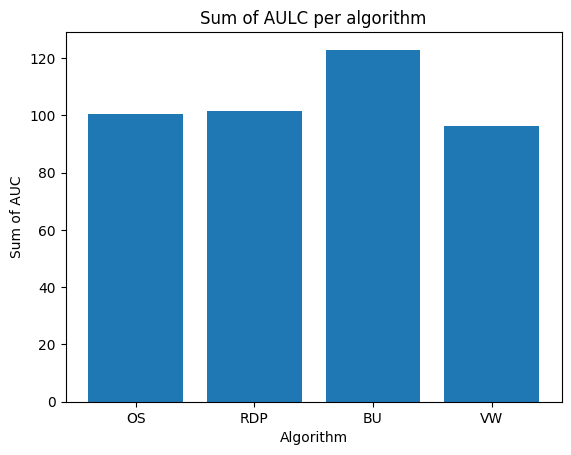

In [8]:
sum_auc = [os_alg_sum_all, rdp_alg_sum_all, bu_alg_sum_all, vw_alg_sum_all]
plt.bar(['OS', 'RDP', 'BU', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

#### Mean AULC

In [9]:
os_alg_mean_all = results.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_all = results.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_all = results.query('simp_algorithm == "BU"')["performance"].mean()
#bu_2_alg_mean_all = results.query('simp_algorithm == "BU_2"')["performance"].mean()
vw_alg_mean_all = results.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AULC per algorithm")
print("OS: ", os_alg_mean_all)
print("RDP: ", rdp_alg_mean_all)
print("BU: ", bu_alg_mean_all)
#print("BU_2: ", bu_2_alg_mean_all)
print("VW: ", vw_alg_mean_all)

Mean of AULC per algorithm
OS:  0.8900744877248389
RDP:  0.8830509875753314
BU:  0.8657799202877041
VW:  0.8372387459366807


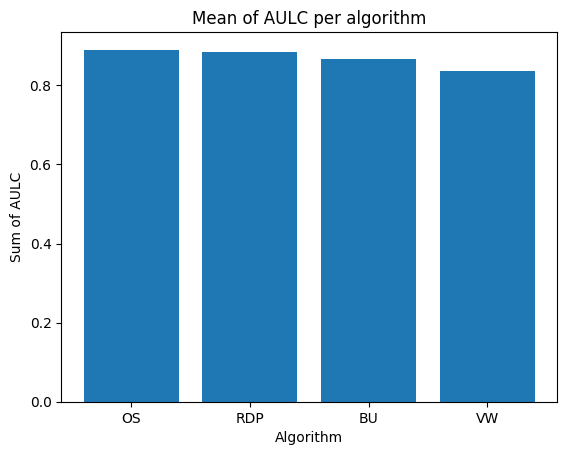

In [10]:
#sum_auc = [os_alg_mean_all, rdp_alg_mean_all, bu_alg_mean_all, bu_2_alg_mean_all, vw_alg_mean_all]
sum_auc = [os_alg_mean_all, rdp_alg_mean_all, bu_alg_mean_all, vw_alg_mean_all]

plt.bar(['OS', 'RDP', 'BU', 'VW'], sum_auc)
plt.title('Mean of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AULC')
plt.show()

#### Mean AULC Per Alg and Model

In [11]:
os_alg_all_per_model = results.query('simp_algorithm == "OS"').groupby("model")["performance"].mean()
rdp_alg_all_per_model = results.query('simp_algorithm == "RDP"').groupby("model")["performance"].mean()
bu_alg_all_per_model = results.query('simp_algorithm == "BU"').groupby("model")["performance"].mean()
#bu_2_alg_all_per_model = results.query('simp_algorithm == "BU_2"').groupby("model")["performance"].mean()
vw_alg_all_per_model = results.query('simp_algorithm == "VW"').groupby("model")["performance"].mean()
print("Mean of AUC per algorithm and model")
print("OS: ", os_alg_all_per_model)
print("RDP: ", rdp_alg_all_per_model)
print("BU: ", bu_alg_all_per_model)
#print("BU_2: ", bu_2_alg_all_per_model)
print("VW: ", vw_alg_all_per_model)

Mean of AUC per algorithm and model
OS:  model
cnn                    0.881757
decision-tree          0.890280
knn                    0.890280
logistic-regression    0.890280
miniRocket             0.895666
Name: performance, dtype: float64
RDP:  model
cnn                    0.870322
decision-tree          0.887694
knn                    0.887694
logistic-regression    0.887694
miniRocket             0.886506
Name: performance, dtype: float64
BU:  model
cnn                    0.885280
decision-tree          0.914798
knn                    0.914798
logistic-regression    0.914798
miniRocket             0.822305
Name: performance, dtype: float64
VW:  model
cnn                    0.845859
decision-tree          0.796375
knn                    0.796375
logistic-regression    0.796375
miniRocket             0.879219
Name: performance, dtype: float64


/tmp/ipykernel_74713/4251764101.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_74713/4251764101.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_74713/4251764101.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_74713/4251764101.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)


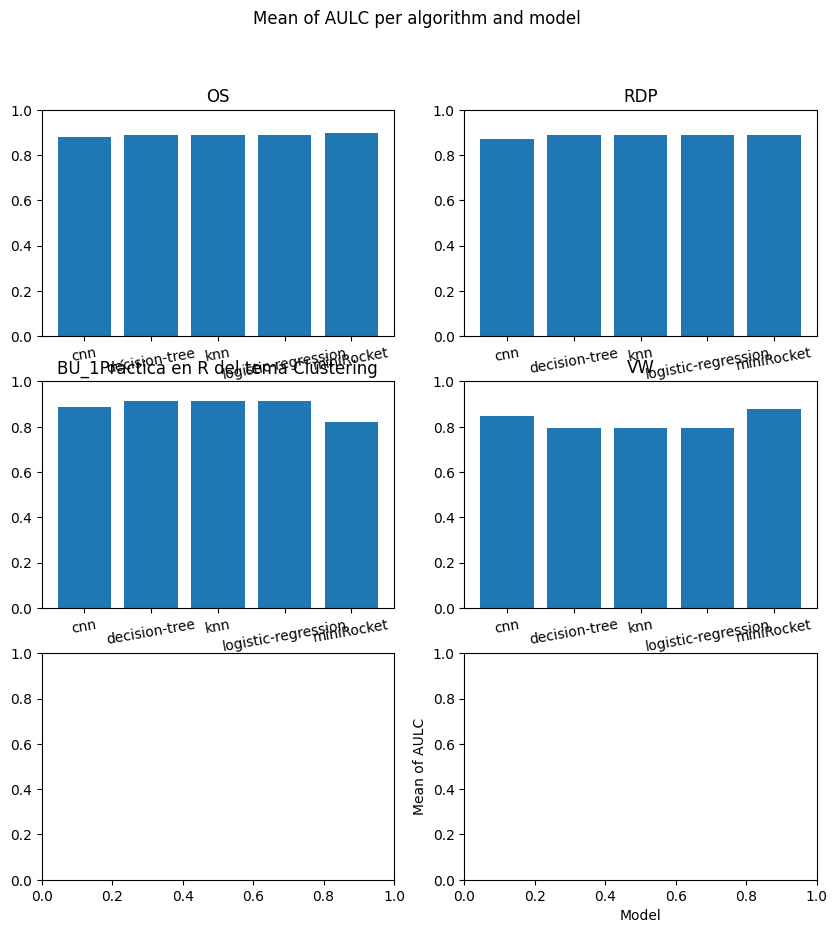

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
ax[0, 0].bar(os_alg_all_per_model.index, os_alg_all_per_model.values)
ax[0, 0].set_title('OS')
ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 0].set_ylim(0, 1)

ax[0, 1].bar(rdp_alg_all_per_model.index, rdp_alg_all_per_model.values)
ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 1].set_title('RDP')
ax[0, 1].set_ylim(0, 1)

ax[1, 0].bar(bu_alg_all_per_model.index, bu_alg_all_per_model.values)
ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
ax[1, 0].set_title('BU_1Práctica en R del tema Clustering')
ax[1, 0].set_ylim(0, 1)

ax[1, 1].bar(vw_alg_all_per_model.index, vw_alg_all_per_model.values)
ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)
ax[1, 1].set_title('VW')
ax[1, 1].set_ylim(0, 1)
"""
ax[2, 0].bar(bu_2_alg_all_per_model.index, bu_2_alg_all_per_model.values)
ax[2, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
ax[2, 0].set_title('BU_1')
ax[2, 0].set_ylim(0, 1)
"""
plt.suptitle('Mean of AULC per algorithm and model')
plt.xlabel('Model')
plt.ylabel('Mean of AULC')
plt.show()


## Model Performance

In [13]:
#Perfromance of models
models_mean_perf_train = models_df.groupby("model_type")["train_acc"].mean()
models_mean_perf_train

model_type
cnn                    0.901954
decision-tree          0.649734
knn                    0.999547
logistic-regression    0.546890
miniRocket             0.998102
Name: train_acc, dtype: float64

#### Train Accuracy

Text(0, 0.5, 'Mean of Train Accuracy')

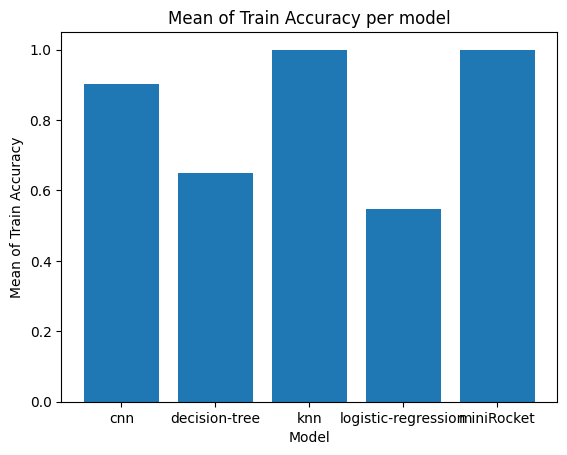

In [14]:
plt.bar(models_mean_perf_train.index, models_mean_perf_train.values) #type: ignore 
plt.title('Mean of Train Accuracy per model')
plt.xlabel('Model')
plt.ylabel('Mean of Train Accuracy')

#### Validation Accuracy

In [15]:
models_mean_perf_val = models_df.groupby("model_type")["val_acc"].mean()
models_mean_perf_val

model_type
cnn                    0.724332
decision-tree          0.452748
knn                    0.648964
logistic-regression    0.467873
miniRocket             0.790399
Name: val_acc, dtype: float64

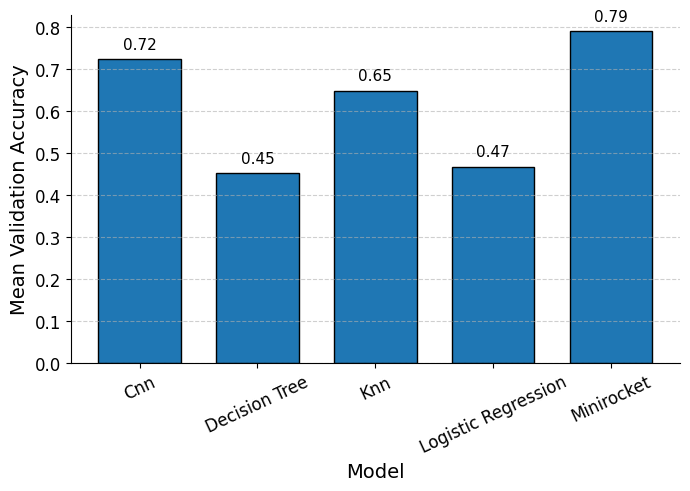

In [16]:
fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar([m.replace("-", " ").title() for m in models_mean_perf_val.index], models_mean_perf_val.values, color='C0', edgecolor='black', width=0.7)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Mean Validation Accuracy', fontsize=14)

ax.tick_params(axis='x', rotation=25, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig("../plots/validation_perf.png")
plt.show()

#### Test Accuracy

In [17]:
models_mean_perf_test = models_df.groupby("model_type")["test_acc"].mean()
models_mean_perf_test

model_type
cnn                    0.773781
decision-tree          0.494429
knn                    0.706363
logistic-regression    0.514192
miniRocket             0.884753
Name: test_acc, dtype: float64

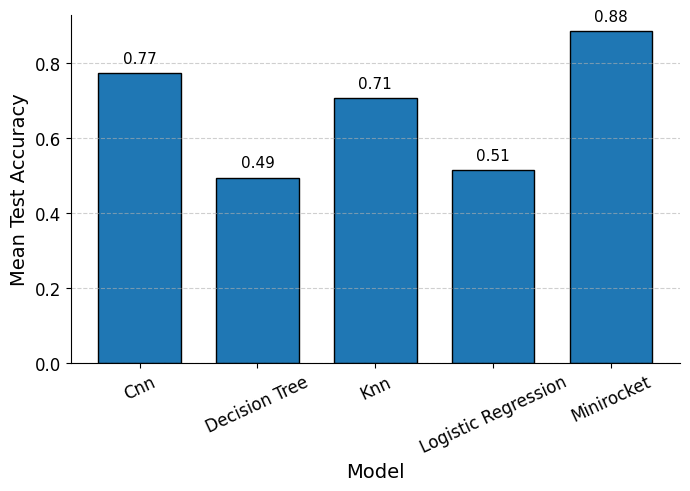

In [18]:
fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar([m.replace("-", " ").title() for m in models_mean_perf_test.index], models_mean_perf_test.values, color='C0', edgecolor='black', width=0.7)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Mean Test Accuracy', fontsize=14)

ax.tick_params(axis='x', rotation=25, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig("../plots/test_perf.png")
plt.show()

### By Class

In [19]:
dataset_class = metadata[["dataset", "Class"]].to_dict()
dataset_class_dict = pd.Series(metadata["Class"].values, index=metadata["dataset"].values).to_dict()
print(dataset_class_dict)
#models_df["class"] = models_df["dataset"].map()

{'Adiac': 37, 'CBF': 3, 'ChlorineConcentration': 3, 'DistalPhalanxOutlineAgeGroup': 3, 'DistalPhalanxOutlineCorrect': 2, 'DistalPhalanxTW': 6, 'ECG200': 2, 'ECG5000': 5, 'ECGFiveDays': 2, 'ElectricDevices': 7, 'FaceAll': 14, 'FacesUCR': 14, 'GunPoint': 2, 'ItalyPowerDemand': 2, 'MedicalImages': 10, 'MiddlePhalanxOutlineAgeGroup': 3, 'MiddlePhalanxOutlineCorrect': 2, 'MiddlePhalanxTW': 6, 'MoteStrain': 2, 'PhalangesOutlinesCorrect': 2, 'Plane': 7, 'ProximalPhalanxOutlineAgeGroup': 3, 'ProximalPhalanxOutlineCorrect': 2, 'ProximalPhalanxTW': 6, 'SonyAIBORobotSurface1': 2, 'SonyAIBORobotSurface2': 2, 'SwedishLeaf': 15, 'SyntheticControl': 6, 'TwoLeadECG': 2, 'TwoPatterns': 4, 'Wafer': 2, 'BME': 3, 'Chinatown': 2, 'Crop': 24, 'GunPointAgeSpan': 2, 'GunPointMaleVersusFemale': 2, 'GunPointOldVersusYoung': 2, 'PowerCons': 2, 'SmoothSubspace': 3, 'UMD': 3}


In [20]:
models_class_df = models_df
models_class_df["class"] = models_class_df["dataset"].map(dataset_class_dict)
models_class_df

,model_type,train_acc,val_acc,test_acc,dataset,class
0,decision-tree,1.000000,0.583333,0.668966,MiddlePhalanxOutlineCorrect,2
1,logistic-regression,0.681462,0.625000,0.593103,MiddlePhalanxOutlineCorrect,2
2,cnn,0.940313,0.977188,1.000000,MiddlePhalanxOutlineCorrect,2
3,cnn,0.922742,0.964063,1.000000,MiddlePhalanxOutlineCorrect,2
4,miniRocket,1.000000,0.822917,0.827586,MiddlePhalanxOutlineCorrect,2
...,...,...,...,...,...,...
155,decision-tree,0.257576,0.176471,0.278846,Plane,7
156,logistic-regression,0.242424,0.176471,0.288462,Plane,7
157,knn,1.000000,0.411765,0.990385,Plane,7
158,cnn,0.949091,0.369412,1.000000,Plane,7


#### Train Accuracy

In [21]:
models_mean_perf_train_per_class = models_class_df
models_mean_perf_train_per_class = models_mean_perf_train_per_class.groupby(["model_type", "class"])["train_acc"].mean()

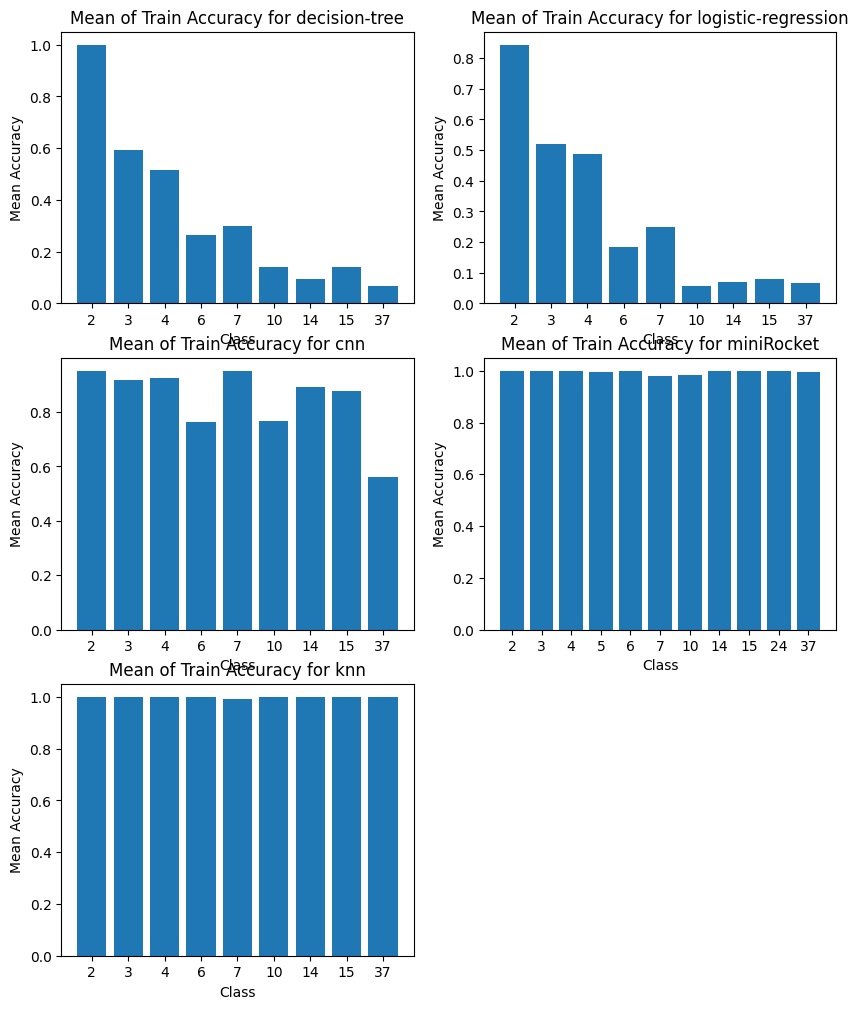

In [22]:
models = models_class_df["model_type"].unique()
num_cols = 2
num_rows = (len(set(models)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, model in enumerate(models):
    model_data = models_mean_perf_train_per_class[model]
    
    x_values = model_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = model_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    ax.set_title(f'Mean of Train Accuracy for {model}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Mean Accuracy')

plt.show()

#### Validation Accuracy

In [23]:
models_mean_perf_val_per_class = models_class_df
models_mean_perf_val_per_class = models_mean_perf_val_per_class.groupby(["model_type", "class"])["val_acc"].mean()

models_perf_dict = {
    model: models_mean_perf_val_per_class[model]
    for model in models_mean_perf_val_per_class.index.get_level_values(0).unique()
}

/tmp/ipykernel_74713/2199870571.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


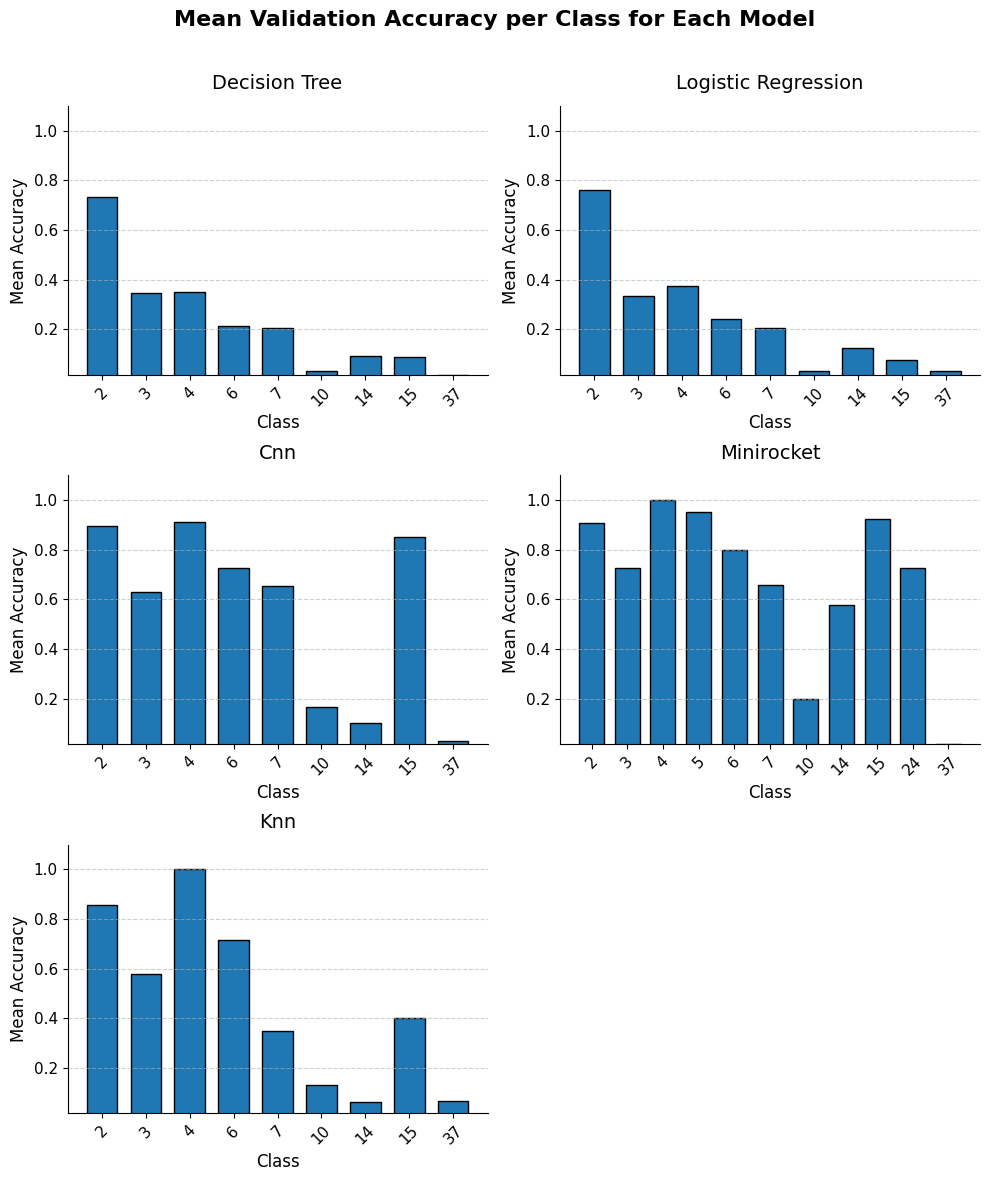

In [24]:
models = models_class_df["model_type"].unique()
num_cols = 2
num_rows = (len(set(models)) + 1) // 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows), constrained_layout=True)

axs = axs.flatten()

y_min = min(np.min(ser.values) for ser in models_perf_dict.values())
y_max = max(np.max(ser.values) for ser in models_perf_dict.values())

for i, model in enumerate(models):
    model_data = models_mean_perf_val_per_class[model]    
    x_values = [str(val) for val in model_data.index.tolist()]
    y_values = model_data.values.tolist()
    
    ax = axs[i]
    bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)
    ax.set_title(f'{model.replace("-", " ").title()}', fontsize=14, pad=12)
    ax.set_xlabel('Class', fontsize=12)
    ax.set_ylabel('Mean Accuracy', fontsize=12)
    ax.set_ylim(y_min, y_max * 1.10)
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=45, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Mean Validation Accuracy per Class for Each Model', fontsize=16, weight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.90)  
plt.show()


## MiniRocket

In [25]:
results_minirocket = results.query('model == "miniRocket"')
results_minirocket.loc[:,'comp@loy=0.8'] = results_minirocket['comp@loy=0.8'].astype(float)
results_minirocket.loc[:,'num_segm@loy=0.8'] = results_minirocket['num_segm@loy=0.8'].astype(float)
print(results_minirocket['simp_algorithm'].unique())

['BU' 'OS' 'RDP' 'VW']


#### Sum AULC

In [26]:
os_alg_sum_minirocket = results_minirocket.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_minirocket = results_minirocket.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_minirocket = results_minirocket.query('simp_algorithm == "BU"')["performance"].sum()
#bu_2_alg_sum_minirocket = results_minirocket.query('simp_algorithm == "BU_2"')["performance"].sum()
vw_alg_sum_minirocket = results_minirocket.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_minirocket)
print("RDP: ", rdp_alg_sum_minirocket)
print("BU: ", bu_alg_sum_minirocket)
#print("BU_2: ", bu_2_alg_sum_minirocket)
print("VW: ", vw_alg_sum_minirocket)

Sum of AULC per algorithm
OS:  35.826634665242324
RDP:  35.46022491969529
BU:  54.27210370278715
VW:  35.16875953209261


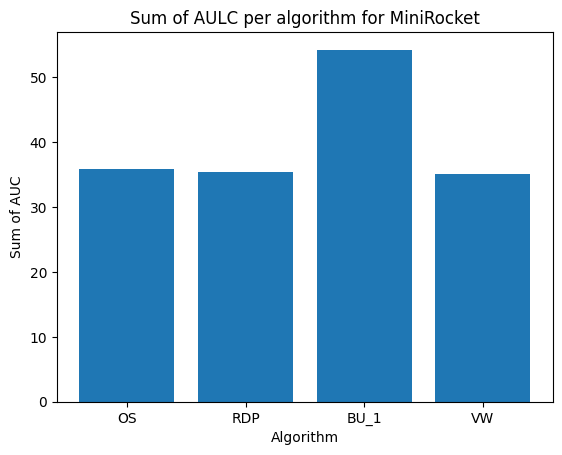

In [27]:
#sum_auc = [os_alg_sum_minirocket, rdp_alg_sum_minirocket, bu_alg_sum_minirocket, bu_2_alg_sum_minirocket, vw_alg_sum_minirocket]
#plt.bar(['OS', 'RDP', 'BU_1', 'BU_2', 'VW'],sum_auc)
sum_auc = [os_alg_sum_minirocket, rdp_alg_sum_minirocket, bu_alg_sum_minirocket, vw_alg_sum_minirocket]
plt.bar(['OS', 'RDP', 'BU_1', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm for MiniRocket')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

#### Mean AULC

In [28]:
os_alg_mean_minirocket = results_minirocket.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_minirocket = results_minirocket.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_minirocket = results_minirocket.query('simp_algorithm == "BU"')["performance"].mean()
#bu_2_alg_mean_minirocket = results_minirocket.query('simp_algorithm == "BU_2"')["performance"].mean()
vw_alg_mean_minirocket = results_minirocket.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AUC per algorithm")
print("OS: ", os_alg_mean_minirocket)
print("RDP: ", rdp_alg_mean_minirocket)
print("BU_1: ", bu_alg_mean_minirocket)
#print("BU_2: ", bu_2_alg_mean_minirocket)
print("VW: ", vw_alg_mean_minirocket)

Mean of AUC per algorithm
OS:  0.8956658666310581
RDP:  0.8865056229923823
BU_1:  0.822304601557381
VW:  0.8792189883023152


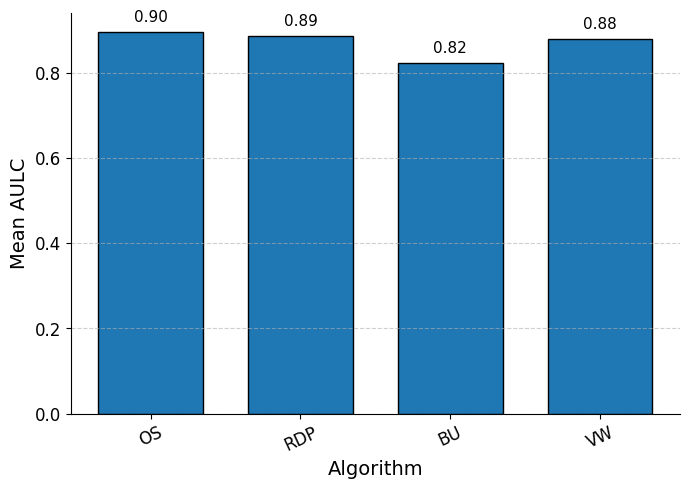

In [29]:
#mean_auc_minirocket = [os_alg_mean_minirocket, rdp_alg_mean_minirocket, bu_2_alg_mean_minirocket, vw_alg_mean_minirocket, bu_alg_mean_minirocket]
mean_auc_minirocket = [os_alg_mean_minirocket, rdp_alg_mean_minirocket, bu_alg_mean_minirocket, vw_alg_mean_minirocket]
#alg_labels = ['OS', 'RDP', 'BU', 'VW', 'GAP_BU']
alg_labels = ['OS', 'RDP', 'BU', 'VW']

#bar_colors = ['C0', 'C0', 'C0', 'C0', 'C7']  
bar_colors = ['C0', 'C0', 'C0', 'C0']  

fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar(
    alg_labels,
    mean_auc_minirocket,
    color=bar_colors,
    edgecolor='black',
    width=0.7,
)

ax.set_xlabel('Algorithm', fontsize=14)
ax.set_ylabel('Mean AULC', fontsize=14)

ax.tick_params(axis='x', rotation=25, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig("../plots/mean_auc_miniRocket.png")  
plt.show()

By Loyalty Threshold

In [30]:
os_alg_mean_minirocket_comp = np.array(results_minirocket.query('simp_algorithm == "OS"')["comp@loy=0.8"], dtype=np.float64).mean()
rdp_alg_mean_minirocket_comp = np.array(results_minirocket.query('simp_algorithm == "RDP"')["comp@loy=0.8"], dtype=np.float64).mean()
bu_alg_mean_minirocket_comp = np.array(results_minirocket.query('simp_algorithm == "BU"')["comp@loy=0.8"], dtype=np.float64).mean()
#bu_2_alg_mean_minirocket_comp = np.array(results_minirocket.query('simp_algorithm == "BU_2"')["comp@loy=0.8"], dtype=np.float64).mean()
vw_alg_mean_minirocket_comp = np.array(results_minirocket.query('simp_algorithm == "VW"')["comp@loy=0.8"], dtype=np.float64).mean()
print("Mean Complexity at Loyalty 0.8 per algorithm")
print("OS: ", os_alg_mean_minirocket_comp)
print("RDP: ", rdp_alg_mean_minirocket_comp)
print("BU: ", bu_alg_mean_minirocket_comp)
#print("BU_2: ", bu_2_alg_mean_minirocket_comp)
print("VW: ", vw_alg_mean_minirocket_comp)

Mean Complexity at Loyalty 0.8 per algorithm
OS:  0.13393563061271313
RDP:  0.1524747542195621
BU:  0.22030343370749103
VW:  0.15482602694364003


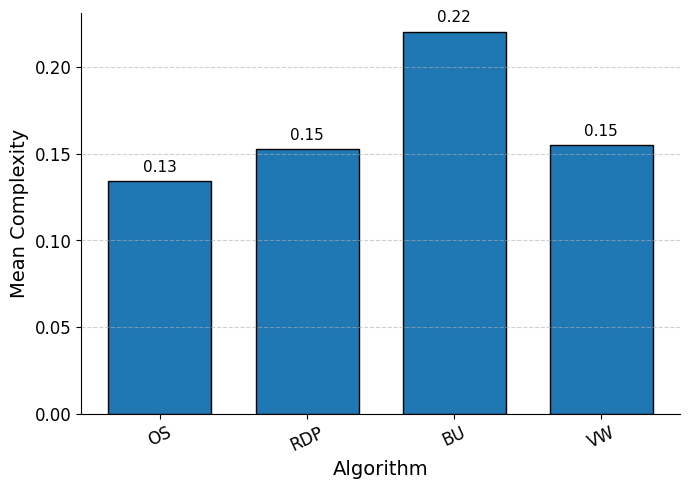

In [31]:
#mean_comp_minirocket = [os_alg_mean_minirocket_comp, rdp_alg_mean_minirocket_comp, bu_alg_mean_minirocket_comp, bu_2_alg_mean_minirocket_comp,vw_alg_mean_minirocket_comp]
mean_comp_minirocket = [os_alg_mean_minirocket_comp, rdp_alg_mean_minirocket_comp, bu_alg_mean_minirocket_comp, vw_alg_mean_minirocket_comp]
alg_labels = ['OS', 'RDP', 'BU', 'VW']

bar_colors = ['C0', 'C0', 'C0', 'C0']  

fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar(
    alg_labels,
    mean_comp_minirocket,
    color=bar_colors,
    edgecolor='black',
    width=0.7,
)

ax.set_xlabel('Algorithm', fontsize=14)
ax.set_ylabel('Mean Complexity', fontsize=14)

ax.tick_params(axis='x', rotation=25, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

In [32]:
os_alg_mean_minirocket_num_seg = np.array(results_minirocket.query('simp_algorithm == "OS"')["num_segm@loy=0.8"], dtype=np.float64).mean()
rdp_alg_mean_minirocket_num_seg = np.array(results_minirocket.query('simp_algorithm == "RDP"')["num_segm@loy=0.8"], dtype=np.float64).mean()
bu_alg_mean_minirocket_num_seg = np.array(results_minirocket.query('simp_algorithm == "BU"')["num_segm@loy=0.8"], dtype=np.float64).mean()
#bu_2_alg_mean_minirocket_num_seg = np.array(results_minirocket.query('simp_algorithm == "BU_2"')["num_segm@loy=0.8"], dtype=np.float64).mean()
vw_alg_mean_minirocket_num_seg = np.array(results_minirocket.query('simp_algorithm == "VW"')["num_segm@loy=0.8"], dtype=np.float64).mean()
print("Mean Number Segments at Loyalty 0.8 per algorithm")
print("OS: ", os_alg_mean_minirocket_num_seg)
print("RDP: ", rdp_alg_mean_minirocket_num_seg)
print("BU_1: ", bu_alg_mean_minirocket_num_seg)
#print("BU_2: ", bu_2_alg_mean_minirocket_num_seg)
print("VW: ", vw_alg_mean_minirocket_num_seg)

Mean Number Segments at Loyalty 0.8 per algorithm
OS:  nan
RDP:  nan
BU_1:  nan
VW:  nan


### By Class:

In [33]:
results_minirocket_class = results_minirocket
results_minirocket_class["class"] = results_minirocket_class["dataset"].map(dataset_class_dict)
#print(results_minirocket_class.head(5))

/tmp/ipykernel_74713/2831525357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_minirocket_class["class"] = results_minirocket_class["dataset"].map(dataset_class_dict)


#### AULC Per Alg and Class

In [34]:
results_minirocket_alg_class = results_minirocket_class.groupby(["simp_algorithm", "class"])["class"].count()
#print(results_minirocket_alg_class)

In [35]:
results_minirocket_alg_class_mean = results_minirocket_class.groupby(["simp_algorithm", "class"])["performance"].mean()
#print(results_minirocket_alg_class_mean)
results_minirocket_alg_class_std = results_minirocket_class.groupby(["simp_algorithm", "class"])["performance"].std()
#print(results_minirocket_alg_class_std)


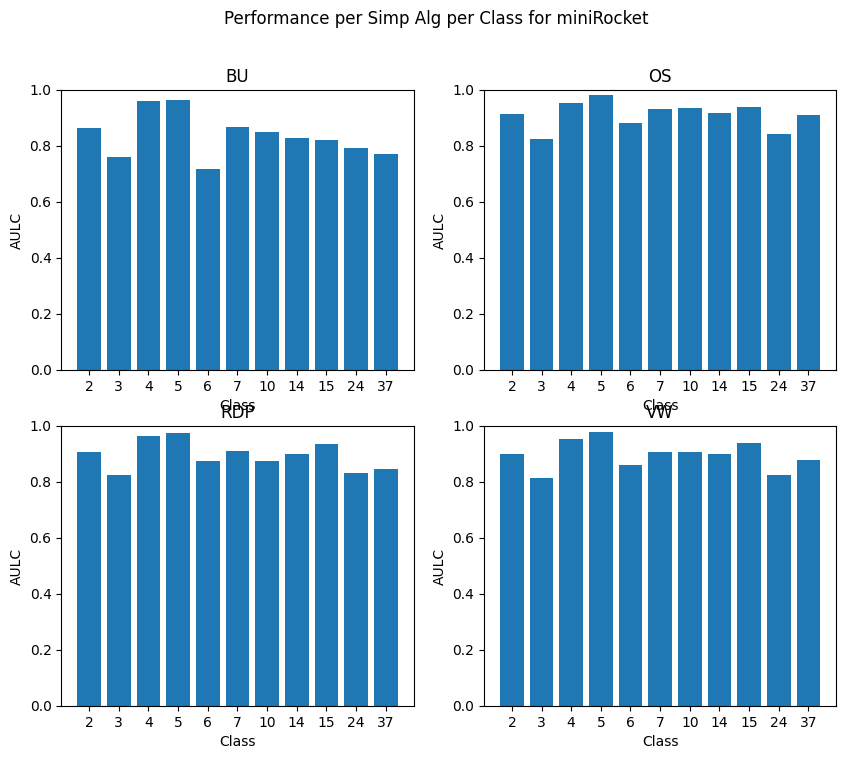

In [36]:
simp_algs = results_minirocket_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_class_mean[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    
    ax.set_title(f'{alg}')
    ax.set_xlabel('Class')
    ax.set_ylabel('AULC')
    ax.set_ylim(0.0, 1.0)

plt.suptitle("Performance per Simp Alg per Class for miniRocket")
plt.show()

Binary vs Multicalss

In [37]:
results_minirocket_class["class_type"] = results_minirocket_class["class"].copy().apply(lambda x: 'binary' if x == 2 else "multiclass")
results_minirocket_alg_bin_vs_mc_mean = results_minirocket_class.groupby(["simp_algorithm", "class_type"])["performance"].mean()
print(results_minirocket_alg_bin_vs_mc_mean)

simp_algorithm  class_type
BU              binary        0.864922
                multiclass    0.796318
OS              binary        0.913572
                multiclass    0.881016
RDP             binary        0.907097
                multiclass    0.869658
VW              binary        0.897247
                multiclass    0.864469
Name: performance, dtype: float64


/tmp/ipykernel_74713/554117524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_minirocket_class["class_type"] = results_minirocket_class["class"].copy().apply(lambda x: 'binary' if x == 2 else "multiclass")


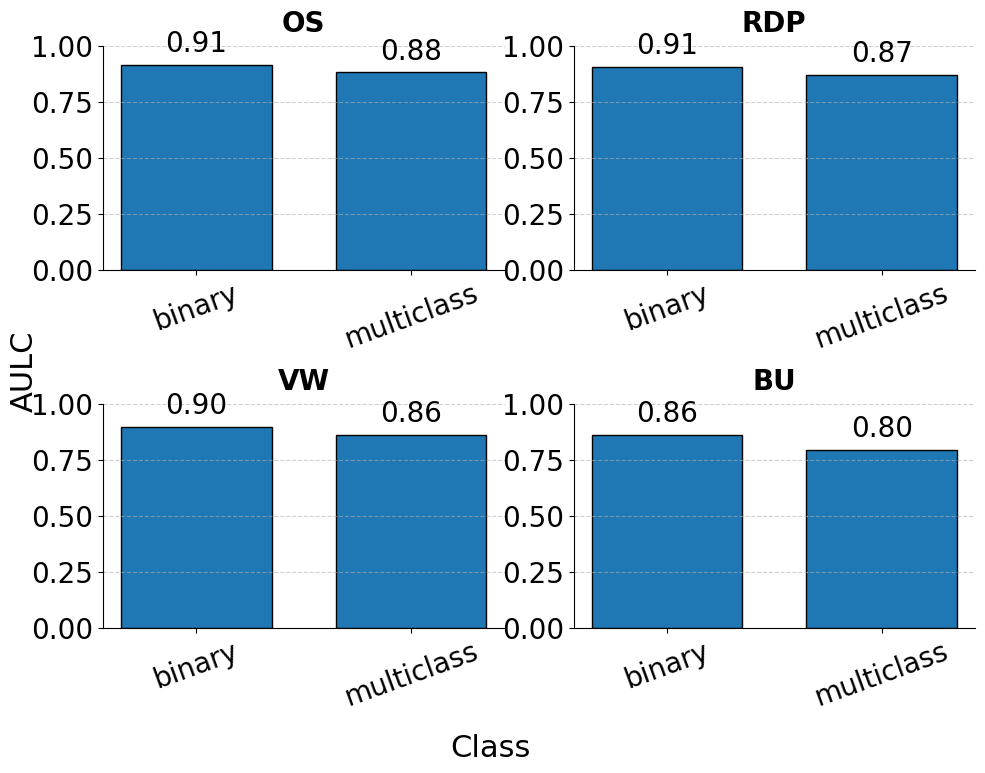

In [38]:

fontsize = 20
#simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']
simp_algs = ['OS', 'RDP', 'VW', 'BU']
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_bin_vs_mc_mean[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    # Set pretty names
    plot_alg = alg
    if alg == 'BU_2':
        plot_alg = 'BU'
    elif alg == 'BU_1':
        plot_alg = 'GAP-BU'

    ax.set_title(f'{plot_alg.upper()}', fontsize=fontsize, fontweight='bold', pad=10)
    ax.set_ylim(0.0, 1.0)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=20, labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.2f}", 
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5), textcoords="offset points",
            ha='center', va='bottom', fontsize=fontsize
        )

# Add common x and y labels to the entire figure
fig.supxlabel('Class', fontsize=fontsize+2)
fig.supylabel('AULC', fontsize=fontsize+2)
# Optionally, add a common title as well:
# fig.suptitle("Performance per Simplification Algorithm per Class for CNN", fontsize=fontsize+4, weight='bold', y=1.01)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # provide space for supxlabel/supylabel (tweak as needed)
plt.savefig("../plots/mean_auc_per_class_minirocket.png")
plt.show()

By Loyalty Threshold

In [39]:
results_minirocket_alg_bin_vs_mc_mean_comp = (results_minirocket_class.groupby(["simp_algorithm", "class_type"])["comp@loy=0.8"]).mean()
print(results_minirocket_alg_bin_vs_mc_mean_comp)

simp_algorithm  class_type
BU              binary        0.170859
                multiclass    0.250452
OS              binary         0.10488
                multiclass    0.157708
RDP             binary        0.116971
                multiclass    0.181523
VW              binary        0.121717
                multiclass    0.181915
Name: comp@loy=0.8, dtype: object


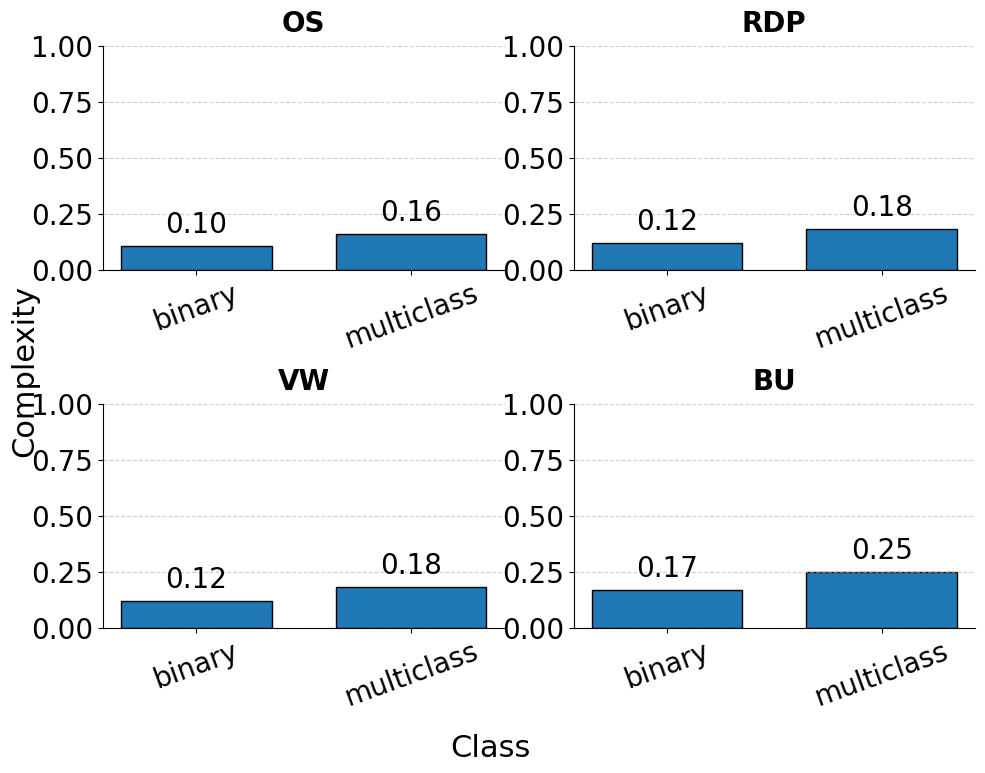

In [40]:

fontsize = 20
simp_algs = ['OS', 'RDP', 'VW', 'BU']
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_bin_vs_mc_mean_comp[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    # Set pretty names
    plot_alg = alg
    if alg == 'BU_2':
        plot_alg = 'BU'
    elif alg == 'BU_1':
        plot_alg = 'GAP-BU'

    ax.set_title(f'{plot_alg.upper()}', fontsize=fontsize, fontweight='bold', pad=10)
    ax.set_ylim(0.0, 1.0)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=20, labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.2f}", 
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5), textcoords="offset points",
            ha='center', va='bottom', fontsize=fontsize
        )

# Add common x and y labels to the entire figure
fig.supxlabel('Class', fontsize=fontsize+2)
fig.supylabel('Complexity', fontsize=fontsize+2)
# Optionally, add a common title as well:
# fig.suptitle("Performance per Simplification Algorithm per Class for minirocket", fontsize=fontsize+4, weight='bold', y=1.01)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # provide space for supxlabel/supylabel (tweak as needed)
plt.savefig("../plots/mean_auc_per_class_minirocket.png")
plt.show()

### By length

In [41]:
dataset_lendth = metadata[["dataset", "Length"]].to_dict()
dataset_length_dict = pd.Series(metadata["Length"].values, index=metadata["dataset"].values).to_dict()
#print(dataset_length_dict)
#models_df["class"] = models_df["dataset"].map()

In [42]:
results_minirocket_length = results_minirocket
results_minirocket_length["length"] = results_minirocket_length["dataset"].map(dataset_length_dict).copy()
#print(results_minirocket_length.head(5))

/tmp/ipykernel_74713/819530652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_minirocket_length["length"] = results_minirocket_length["dataset"].map(dataset_length_dict).copy()


In [43]:
results_minirocket_alg_length_mean = results_minirocket_length.groupby(["simp_algorithm", "length"])["performance"].mean()

print(results_minirocket_alg_length_mean)

simp_algorithm  length
BU              15        0.695972
                24        0.788772
                46        0.791126
                60        0.896822
                65        0.831757
                            ...   
VW              144       0.934665
                150       0.971190
                152       0.963021
                166       0.409594
                176       0.878722
Name: performance, Length: 80, dtype: float64


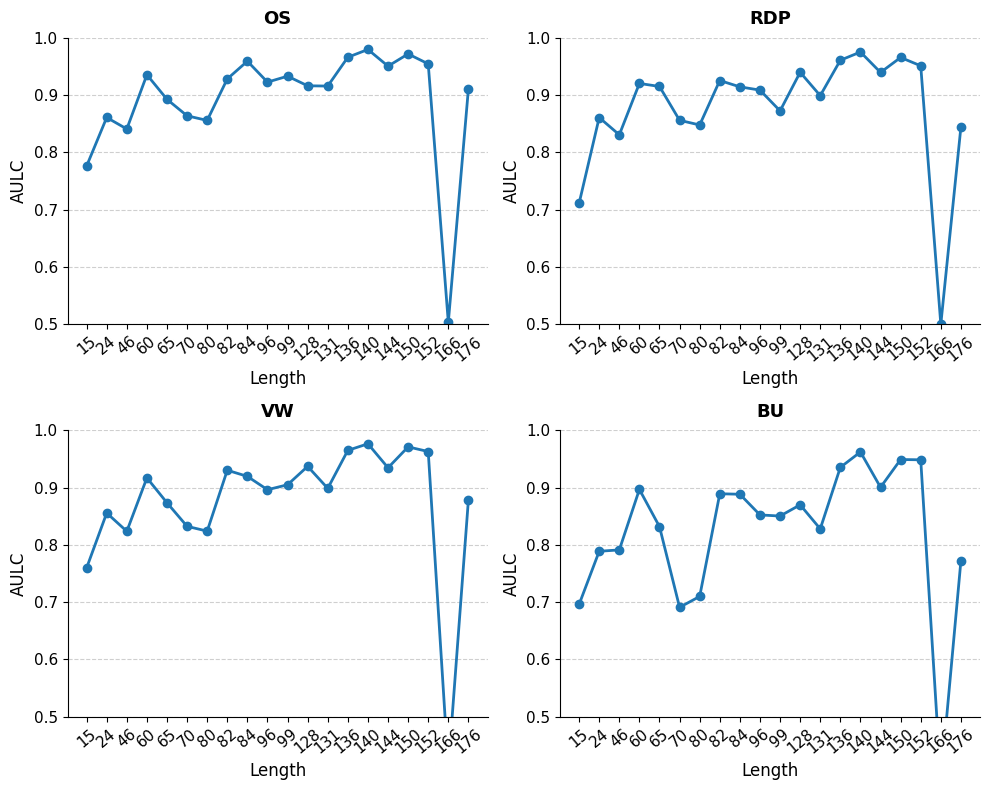

In [44]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_length_mean[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        ax.plot(x_values, y_values, marker='o', color='C7', linewidth=2)
    else:
        ax.plot(x_values, y_values, marker='o', color='C0', linewidth=2)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Length', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.5, 1.0)
    
    
    ax.tick_params(axis='x', rotation=40, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #for x, y in zip(x_values, y_values):
    #    ax.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,8),ha='center', fontsize=10)

#fig.suptitle("Performance per Simplification Algorithm per Length for CNN", fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.savefig("../plots/mean_auc_length_minirocket.png")
plt.show()

By Loyalty Threshold

In [45]:
results_minirocket_alg_length_mean_comp = results_minirocket_length.groupby(["simp_algorithm", "length"])["comp@loy=0.8"].mean()

print(results_minirocket_alg_length_mean_comp)

simp_algorithm  length
BU              15        0.465715
                24          0.2219
                46        0.291446
                60        0.150623
                65        0.214119
                            ...   
VW              144       0.076328
                150       0.035601
                152       0.045621
                166       0.841692
                176       0.122578
Name: comp@loy=0.8, Length: 80, dtype: object


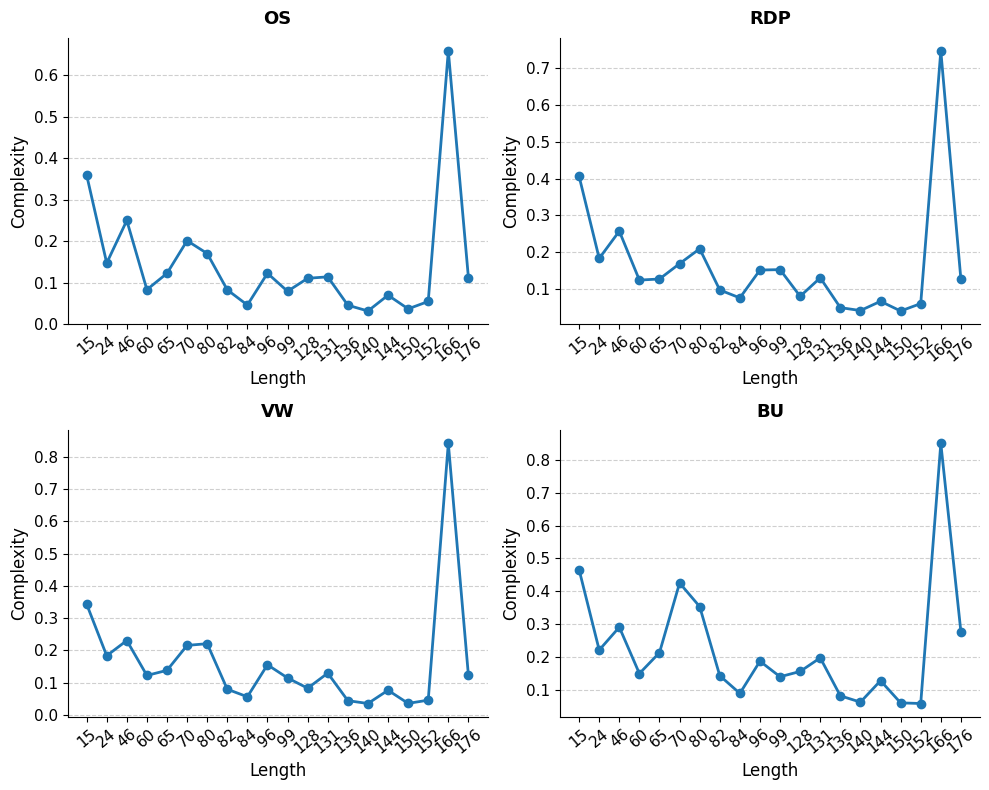

In [46]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW','BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_length_mean_comp[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        ax.plot(x_values, y_values, marker='o', color='C7', linewidth=2)
    else:
        ax.plot(x_values, y_values, marker='o', color='C0', linewidth=2)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Length', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    #ax.set_ylim(0.5, 1.0)
    
    
    ax.tick_params(axis='x', rotation=40, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #for x, y in zip(x_values, y_values):
    #    ax.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,8),ha='center', fontsize=10)

#fig.suptitle("Performance per Simplification Algorithm per Length for CNN", fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

### By Stationarity

In [47]:
dataset_stat = metadata[["dataset", "Stationary"]].to_dict()
dataset_stat_dict = pd.Series(metadata["Stationary"].values, index=metadata["dataset"].values).to_dict()
results_minirocket_stat = results_minirocket
results_minirocket_stat["stationary"] = results_minirocket_stat["dataset"].map(dataset_stat_dict).copy()

results_minirocket_alg_stat_mean = results_minirocket_stat.groupby(["simp_algorithm", "stationary"])["performance"].mean()

/tmp/ipykernel_74713/64242921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_minirocket_stat["stationary"] = results_minirocket_stat["dataset"].map(dataset_stat_dict).copy()


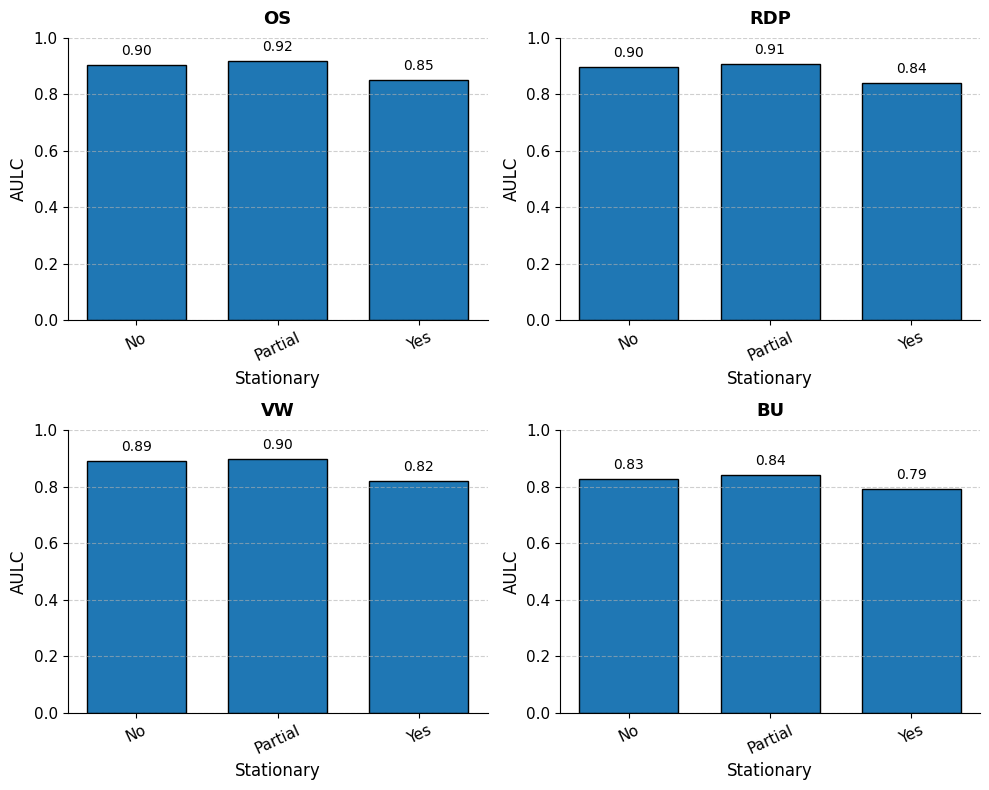

In [48]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_stat_mean[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' else 'No' if x.lower() == 'false' else x for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Stationary', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_stationary_minirocket.png")
plt.show()

By Loyalty Threshold

In [49]:
results_minirocket_alg_stat_mean_comp = results_minirocket_stat.groupby(["simp_algorithm", "stationary"])["comp@loy=0.8"].mean()

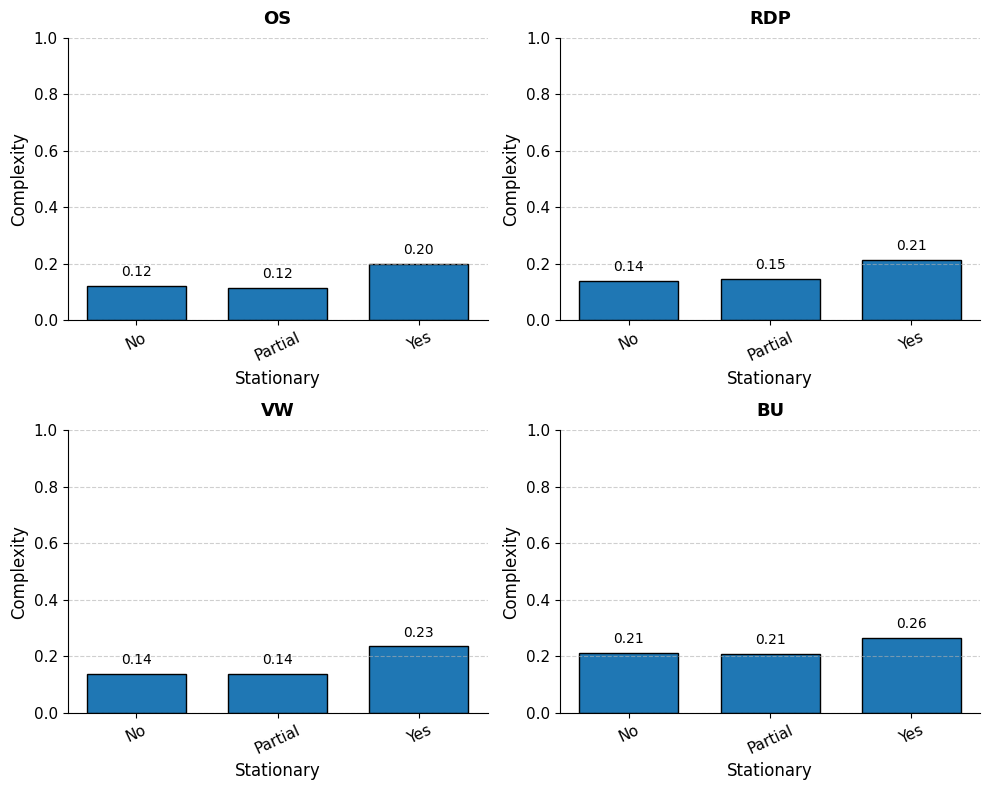

In [50]:
#simp_algs = results_minirocket_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_stat_mean_comp[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' else 'No' if x.lower() == 'false' else x for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Stationary', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_stationary_minirocket.png")
plt.show()

### By Seasonality

In [51]:
dataset_season = metadata[["dataset", "Seasonal"]].to_dict()
dataset_season_dict = pd.Series(metadata["Seasonal"].values, index=metadata["dataset"].values).to_dict()
results_minirocket_season = results_minirocket
results_minirocket_season["seasonal"] = results_minirocket_season["dataset"].map(dataset_season_dict).copy()

results_minirocket_alg_season_mean = results_minirocket_season.groupby(["simp_algorithm", "seasonal"])["performance"].mean()

/tmp/ipykernel_74713/581459350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_minirocket_season["seasonal"] = results_minirocket_season["dataset"].map(dataset_season_dict).copy()


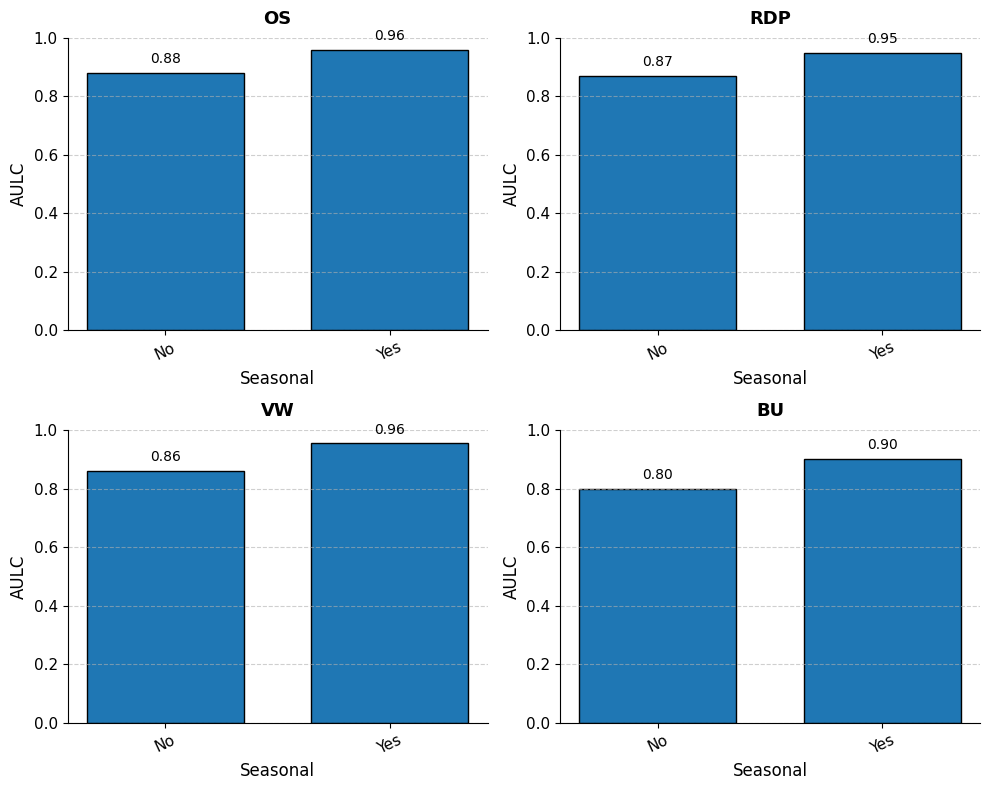

In [52]:
#simp_algs = results_minirocket_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_season_mean[alg]
    
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' 
                else 'No' if x.lower() == 'false' 
                else x.title() for x in x_values]

    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Seasonal', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars with values
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("../plots/mean_auc_seasonality_minirocket.png")
plt.show()


By Loyalty Threshold

In [53]:
results_minirocket_alg_season_mean_comp = results_minirocket_season.groupby(["simp_algorithm", "seasonal"])["comp@loy=0.8"].mean()

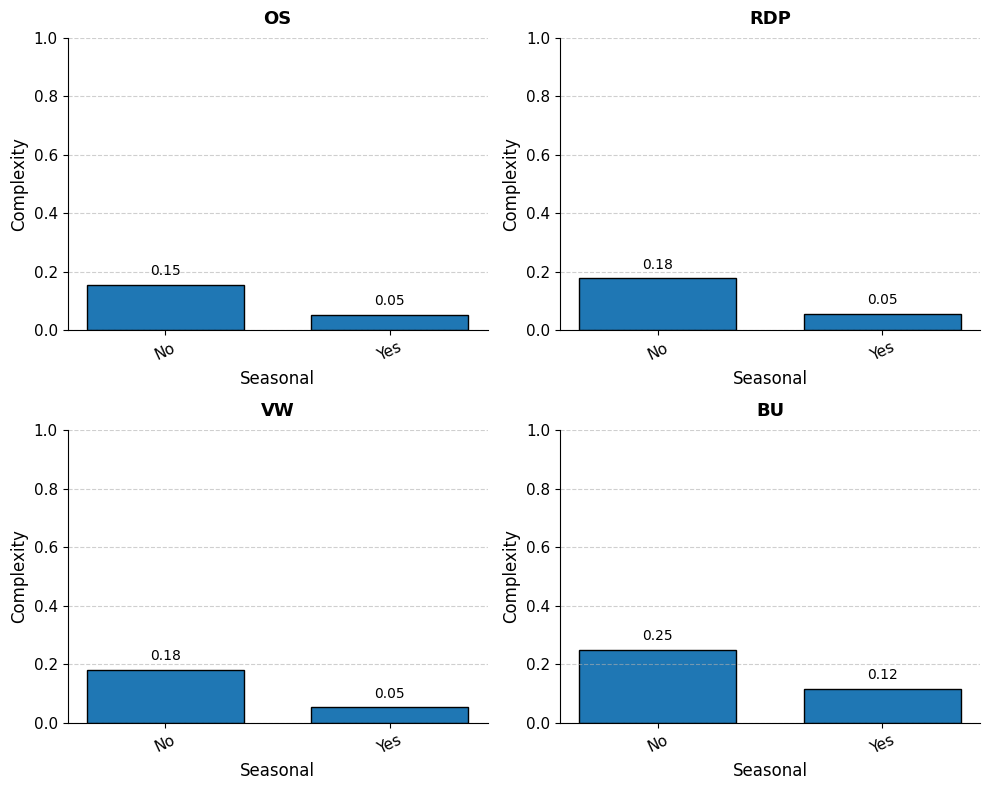

In [54]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_season_mean_comp[alg]
    
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' 
                else 'No' if x.lower() == 'false' 
                else x.title() for x in x_values]

    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Seasonal', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars with values
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("../plots/mean_auc_seasonality_minirocket.png")
plt.show()


### By Entropy

In [55]:
metadata["Entropy_bins"], _ = pd.qcut(metadata["Entropy"], q=3, labels=[0,1,2], retbins=True)

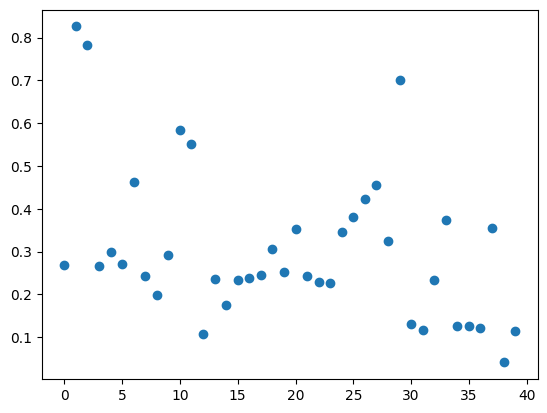

In [56]:
entropy_list = metadata["Entropy"].tolist()
plt.scatter(range(len(entropy_list)), entropy_list)
plt.show()  

In [57]:
entropy_bin_counts = metadata["Entropy_bins"].value_counts().sort_index()
print("Number of datasets per Entropy bin:")
print(entropy_bin_counts)

Number of datasets per Entropy bin:
Entropy_bins
0    14
1    12
2    14
Name: count, dtype: int64


In [58]:
_, bins = pd.qcut(metadata["Entropy"], q=3, labels=[0,1,2], retbins=True)
print(bins)

[0.04079289 0.23429134 0.32568998 0.82591962]


In [59]:
metadata.query("Entropy_bins == 0")

,ID,Type,dataset,Train,Test,Class,Length,ED (w=0),DTW (learned_w),DTW (w=100),Default rate,Stationary,Seasonal,Entropy,Entropy_bins
8,22,ECG,ECGFiveDays,23,861,2,136,0.2033,0.2033 (0),0.2323,0.4971,Partial,False,0.198715,0
12,31,Motion,GunPoint,50,150,2,150,0.0867,0.0867 (0),0.0933,0.4933,False,True,0.107118,0
14,44,Image,MedicalImages,381,760,10,99,0.3158,0.2526 (20),0.2632,0.4855,False,False,0.175250,0
15,45,Image,MiddlePhalanxOutlineAgeGroup,400,154,3,80,0.4805,0.4805 (0),0.5000,0.4286,False,False,0.233817,0
22,57,Image,ProximalPhalanxOutlineCorrect,600,291,2,80,0.1924,0.2096 (1),0.2165,0.3162,False,False,0.228385,0
23,58,Image,ProximalPhalanxTW,400,205,6,80,0.2927,0.2439 (2),0.2439,0.6488,False,False,0.227575,0
30,80,Sensor,Wafer,1000,6164,2,152,0.0045,0.0045 (1),0.0201,0.1079,False,False,0.129990,0
31,90,Simulated,BME,30,150,3,128,0.1667,0.0200 (4),0.1000,0.6667,False,True,0.116147,0
32,91,Traffic,Chinatown,20,343,2,24,0.0466,0.0466 (0),0.0437,0.2741,False,False,0.234291,0
34,107,Motion,GunPointAgeSpan,135,316,2,150,0.1013,0.0348 (3),0.0823,0.4937,False,True,0.126225,0


In [60]:
dataset_entropy = metadata[["dataset", "Entropy_bins"]].to_dict()
dataset_entropy_dict = pd.Series(metadata["Entropy_bins"].values, index=metadata["dataset"].values).to_dict()
results_minirocket_entropy = results_minirocket
results_minirocket_entropy["entropy"] = results_minirocket_entropy["dataset"].map(dataset_entropy_dict).copy()

results_minirocket_alg_entropy_mean = results_minirocket_entropy.groupby(["simp_algorithm", "entropy"])["performance"].mean()

/tmp/ipykernel_74713/1685653629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_minirocket_entropy["entropy"] = results_minirocket_entropy["dataset"].map(dataset_entropy_dict).copy()


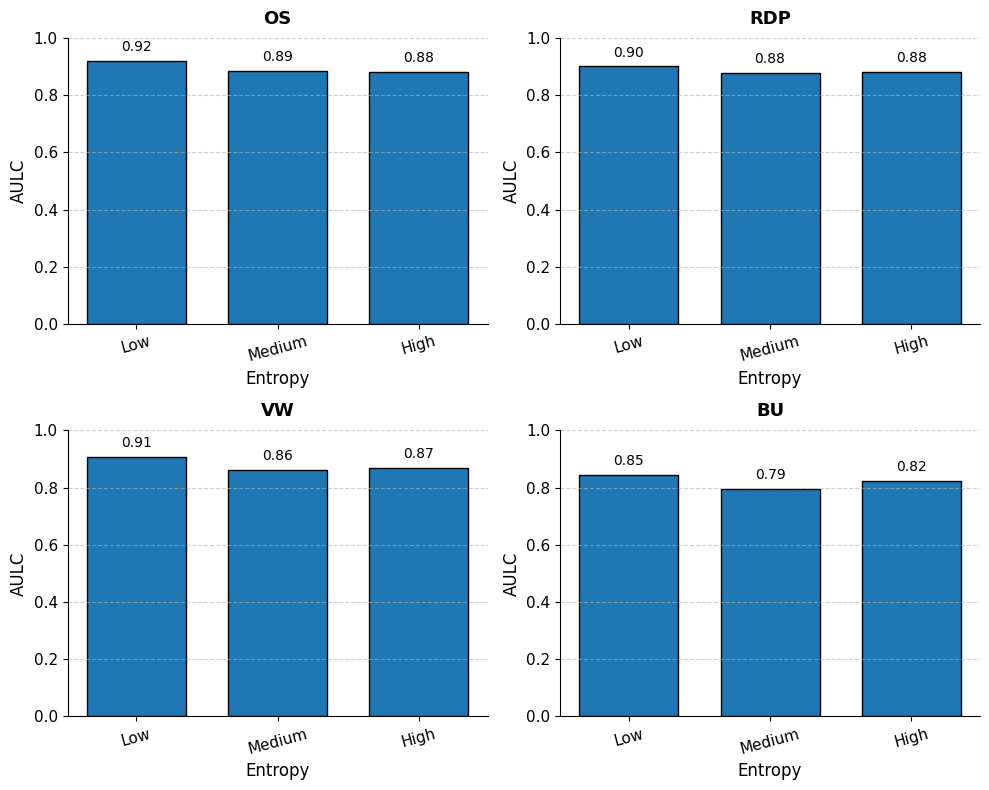

In [61]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
#simp_algs = ['OS', 'RDP', 'VW', 'BU_1']
simp_algs = ['OS', 'RDP', 'VW', 'BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

entropy_labels = ["Low", "Medium", "High"]

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_entropy_mean[alg]
    x_values = list(simp_alg_data.index)
    tick_positions = [int(x) for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(tick_positions, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(tick_positions, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Entropy', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(entropy_labels)
    ax.tick_params(axis='x', labelsize=11, rotation=15)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_entropy_minirocket.png")
plt.show()


By Loyalty Threshold

In [62]:
results_minirocket_alg_entropy_mean_comp = results_minirocket_entropy.groupby(["simp_algorithm", "entropy"])["comp@loy=0.8"].mean()

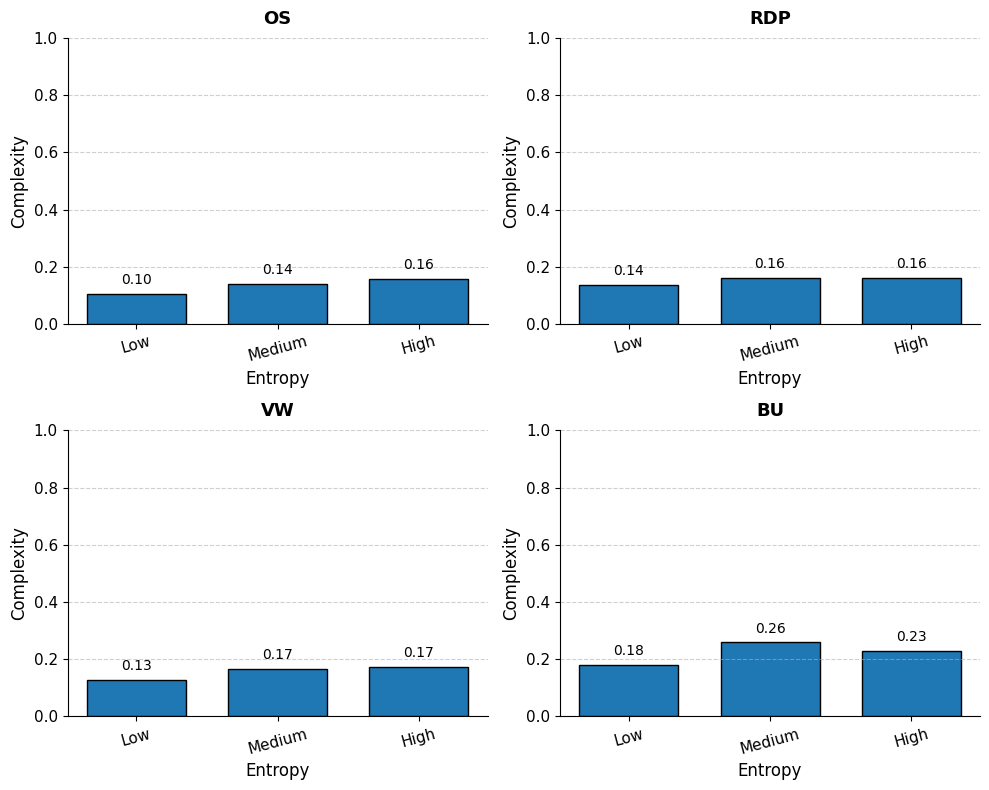

In [63]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

entropy_labels = ["Low", "Medium", "High"]

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_entropy_mean_comp[alg]
    x_values = list(simp_alg_data.index)
    tick_positions = [int(x) for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(tick_positions, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(tick_positions, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Entropy', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(entropy_labels)
    ax.tick_params(axis='x', labelsize=11, rotation=15)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_entropy_minirocket.png")
plt.show()


### Combined Properties

In [72]:
results_minirocket_best_case = results_minirocket.query(f"seasonal == True & stationary == 'Partial'")
results_minirocket_best_case

,dataset,model,simp_algorithm,performance,comp@loy=0.8,num_segm@loy=0.8,time,class,class_type,length,stationary,seasonal,entropy


In [65]:
"""
auc_perf = np.array([round(result*100,4) for result in results_minirocket_best_case["performance"].to_list()])
simp_alg = results_minirocket_best_case["simp_algorithm"].unique()
auc_perf = np.array_split(auc_perf, 4)
datasets = results_minirocket_best_case["dataset"].unique()

best_resulting_table = pd.DataFrame(auc_perf, columns=simp_alg, index=datasets)
best_resulting_table.loc["Mean"] = best_resulting_table.select_dtypes(include=['number']).mean()
best_resulting_table
"""

'\nauc_perf = np.array([round(result*100,4) for result in results_minirocket_best_case["performance"].to_list()])\nsimp_alg = results_minirocket_best_case["simp_algorithm"].unique()\nauc_perf = np.array_split(auc_perf, 4)\ndatasets = results_minirocket_best_case["dataset"].unique()\n\nbest_resulting_table = pd.DataFrame(auc_perf, columns=simp_alg, index=datasets)\nbest_resulting_table.loc["Mean"] = best_resulting_table.select_dtypes(include=[\'number\']).mean()\nbest_resulting_table\n'

## Overall Table

In [66]:
#results_cnn_alg_stat_mean

def dataframe_to_dict(df: pd.DataFrame, cls, add_string:str = "", as_percentage: bool = True) -> dict:
    df_dict = df.to_dict()
    #assert type(list(df_dict.keys())[0][1]) == type(cls), f"cls not matching types {type(list(df_dict.keys())[0][1])}, {type(cls)}"
    if as_percentage:
        cls_dict = {key[0]:round(df_dict[key]*100,2) for key in df_dict if key[1] == cls}
    else:
        cls_dict = {key[0]:round(df_dict[key],2) for key in df_dict if key[1] == cls}
    cls_dict["metric"] = add_string
    return cls_dict

In [67]:
rows = []
#mean_auc_minirocket= [os_alg_mean_minirocket, rdp_alg_mean_minirocket, bu_alg_mean_minirocket, bu_2_alg_mean_minirocket, vw_alg_mean_minirocket]
mean_auc_minirocket= [os_alg_mean_minirocket, rdp_alg_mean_minirocket, bu_alg_mean_minirocket, vw_alg_mean_minirocket]

mean_auc_minirocket_perc = [value*100 for value in mean_auc_minirocket]
mean = dict(zip(["metric","OS", "RDP", "BU", "VW"], ["Mean"]+ mean_auc_minirocket_perc))
rows.append(mean)

class_dict_bin = dataframe_to_dict(results_minirocket_alg_bin_vs_mc_mean, "binary", "Binary")
rows.append(class_dict_bin)
class_dict_mc = dataframe_to_dict(results_minirocket_alg_bin_vs_mc_mean, "multiclass", "Multiclass")
rows.append(class_dict_mc)

stat_dict_true = dataframe_to_dict(results_minirocket_alg_stat_mean, "True", "Stationary")
rows.append(stat_dict_true)
stat_dict_false = dataframe_to_dict(results_minirocket_alg_stat_mean, "False", "Non-Stationary")
rows.append(stat_dict_false)
stat_dict_partial = dataframe_to_dict(results_minirocket_alg_stat_mean, "Partial", "Partially-Stational")
rows.append(stat_dict_partial)

ses_dict_true = dataframe_to_dict(results_minirocket_alg_season_mean, True, "Seasonal")
rows.append(ses_dict_true)
ses_dict_false = dataframe_to_dict(results_minirocket_alg_season_mean, False, "Non-Seasonal")
rows.append(ses_dict_false)

entropy_dict_true = dataframe_to_dict(results_minirocket_alg_entropy_mean, 0, "Low_Entropy")
rows.append(entropy_dict_true)
entropy_dict_false = dataframe_to_dict(results_minirocket_alg_entropy_mean, 1, "Medium_Entropy")
rows.append(entropy_dict_false)
entropy_dict_partial = dataframe_to_dict(results_minirocket_alg_entropy_mean, 2, "High_Entropy")
rows.append(entropy_dict_partial)

pd.set_option('display.precision', 2)

#metrics_df = pd.DataFrame.from_dict(rows).sort_values(by='OS', ascending=False)
metrics_df = pd.DataFrame.from_dict(rows)
metrics_df = metrics_df.set_index('metric')
metrics_df


,OS,RDP,BU,VW
metric,,,,
Mean,89.57,88.65,82.23,87.92
Binary,91.36,90.71,86.49,89.72
Multiclass,88.10,86.97,79.63,86.45
Stationary,85.06,83.97,79.32,82.08
Non-Stationary,90.40,89.55,82.71,89.10
Partially-Stational,91.71,90.62,84.22,89.76
Seasonal,95.90,94.73,90.21,95.52
Non-Seasonal,87.98,87.13,80.08,86.02
Low_Entropy,91.83,90.01,84.57,90.57


Results comp@loy=0.8

In [68]:
rows = []
mean_comp_minirocket_perc = mean_comp_minirocket
#mean_comp_minirocket_perc = [value*100 for value in mean_comp_minirocket]
mean = dict(zip(["metric","OS", "RDP", "BU", "VW"], ["Mean"]+ mean_comp_minirocket_perc))
rows.append(mean)


class_dict_bin_comp = dataframe_to_dict(results_minirocket_alg_bin_vs_mc_mean_comp, "binary", "Binary", as_percentage=False)
rows.append(class_dict_bin_comp)
class_dict_mc_comp = dataframe_to_dict(results_minirocket_alg_bin_vs_mc_mean_comp, "multiclass", "Multiclass", as_percentage=False)
rows.append(class_dict_mc_comp)

stat_dict_true_comp = dataframe_to_dict(results_minirocket_alg_stat_mean_comp, "True", "Stationary", as_percentage=False)
rows.append(stat_dict_true_comp)
stat_dict_false_comp = dataframe_to_dict(results_minirocket_alg_stat_mean_comp, "False", "Non-Stationary", as_percentage=False)
rows.append(stat_dict_false_comp)
stat_dict_partial_comp = dataframe_to_dict(results_minirocket_alg_stat_mean_comp, "Partial", "Partially-Stational", as_percentage=False)
rows.append(stat_dict_partial_comp)

ses_dict_true_comp = dataframe_to_dict(results_minirocket_alg_season_mean_comp, True, "Seasonal", as_percentage=False)
rows.append(ses_dict_true_comp)
ses_dict_false_comp = dataframe_to_dict(results_minirocket_alg_season_mean_comp, False, "Non-Seasonal", as_percentage=False)
rows.append(ses_dict_false_comp)

entropy_dict_true_comp = dataframe_to_dict(results_minirocket_alg_entropy_mean_comp, 0, "Low_Entropy", as_percentage=False)
rows.append(entropy_dict_true_comp)
entropy_dict_false_comp = dataframe_to_dict(results_minirocket_alg_entropy_mean_comp, 1, "Medium_Entropy", as_percentage=False)
rows.append(entropy_dict_false_comp)
entropy_dict_partial_comp = dataframe_to_dict(results_minirocket_alg_entropy_mean_comp, 2, "High_Entropy", as_percentage=False)
rows.append(entropy_dict_partial_comp)

#pd.set_option('display.precision', 2)

#metrics_df = pd.DataFrame.from_dict(rows).sort_values(by='OS', ascending=False)
metrics_df = pd.DataFrame.from_dict(rows)
metrics_df = metrics_df.set_index('metric')
metrics_df


,OS,RDP,BU,VW
metric,,,,
Mean,0.13,0.15,0.22,0.15
Binary,0.10,0.12,0.17,0.12
Multiclass,0.16,0.18,0.25,0.18
Stationary,0.20,0.21,0.26,0.23
Non-Stationary,0.12,0.14,0.21,0.14
Partially-Stational,0.12,0.15,0.21,0.14
Seasonal,0.05,0.05,0.12,0.05
Non-Seasonal,0.15,0.18,0.25,0.18
Low_Entropy,0.10,0.14,0.18,0.13
